The problem definition is that we have a sequence of images and we need to predict a sequence of steering wheel angles . So this is a type of regression problem .

For simplicity , we will pose the problem as predicting a steering wheel angle(some real value) given an image . i.e. a CNN - regression problem .

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mounting google drive to use the data directly in colab

In [2]:
!unzip /content/drive/MyDrive/driving_dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: driving_dataset/33032.jpg  
  inflating: driving_dataset/33149.jpg  
  inflating: driving_dataset/3315.jpg  
  inflating: driving_dataset/33158.jpg  
  inflating: driving_dataset/33160.jpg  
  inflating: driving_dataset/33164.jpg  
  inflating: driving_dataset/33167.jpg  
  inflating: driving_dataset/33199.jpg  
  inflating: driving_dataset/33239.jpg  
  inflating: driving_dataset/33267.jpg  
  inflating: driving_dataset/3342.jpg  
  inflating: driving_dataset/33473.jpg  
  inflating: driving_dataset/3352.jpg  
  inflating: driving_dataset/33524.jpg  
  inflating: driving_dataset/33678.jpg  
  inflating: driving_dataset/33689.jpg  
  inflating: driving_dataset/3370.jpg  
  inflating: driving_dataset/33705.jpg  
  inflating: driving_dataset/33715.jpg  
  inflating: driving_dataset/33726.jpg  
  inflating: driving_dataset/33734.jpg  
  inflating: driving_dataset/33766.jpg  
  inflating: driving_dataset/33816.jpg  
  inflatin

Extracted the data folder

In [3]:
import torch
import torch.nn as nn 
import torch.optim as optim  
import torchvision.transforms as transforms
import torchvision
import os
import pandas as pd
from PIL import Image
from torch.utils.data import (
    Dataset,
    DataLoader,
)

Imported necessary libraries

In [4]:
class RegressionDataset(Dataset):
    def __init__(self, txt_file, root_dir, transform=None):
        with open(txt_file) as f:
            self.data = f.readlines()
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        line = self.data[index].strip().split()
        img_path = os.path.join(self.root_dir, line[0])
        image = Image.open(img_path)
        target = float(line[1])

        if self.transform:
            image = self.transform(image)

        return (image, target)

Constructed custom dataset for loading data

In [23]:
transform = transforms.Compose([
    transforms.Resize((256,256)),
    transforms.ToTensor(),
    #transforms.Lambda(lambda x: x / 255)
])

Necessary transformations on image

In [6]:
dataset = RegressionDataset(
    txt_file="/content/drive/MyDrive/data.txt",
    root_dir="driving_dataset",
    transform=transform
)

In [7]:
'''dataloader = DataLoader(
    dataset,
    batch_size=10,
    shuffle=True,
    num_workers=1,
)'''

'dataloader = DataLoader(\n    dataset,\n    batch_size=10,\n    shuffle=True,\n    num_workers=1,\n)'

In [8]:
from torch.utils.data import random_split

train_dataset, test_dataset = random_split(dataset, [int(len(dataset) * 0.8), len(dataset) - int(len(dataset) * 0.8)])

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

Splitted the data with 80% as train data and 20% as test data  then constructed data loader for both train and test dataset

In [9]:
batch = next(iter(train_dataloader))

In [10]:
images= batch[0]
targets = batch[1]

In [11]:
images.shape

torch.Size([32, 3, 256, 256])

In [12]:
targets.shape

torch.Size([32])

labels : tensor([  0.7100, 227.6000,  -3.0300,   0.0000, -35.8000,   2.4200,   8.2700,
        -41.1400,   9.6800,   7.3600, -19.8700,   7.1600,   5.4500, -15.4300,
         42.1500,  -1.7100,  -1.8200,   3.8300,   0.4000, -21.4800, -56.4700,
          1.7100,  74.2200,  27.2300,   2.5200,  -2.2200, -16.0300,  16.6400,
          1.2100,  -1.6100,   7.4600,   1.4100], dtype=torch.float64)


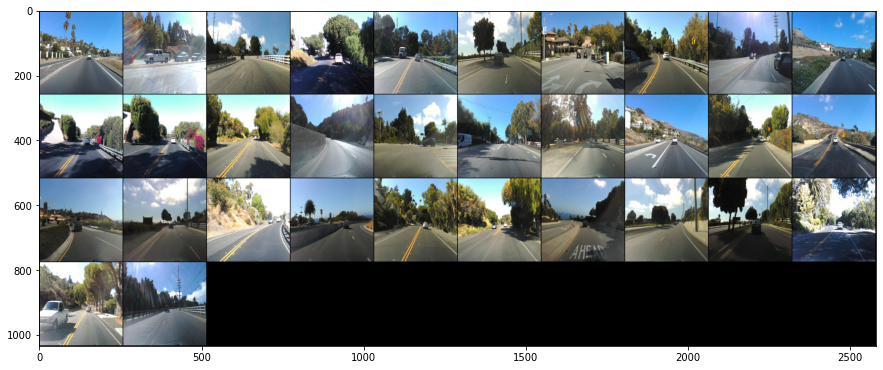

In [13]:
import numpy as np
import matplotlib.pyplot as plt
grid = torchvision.utils.make_grid(images,nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid,(1,2,0)))
print(f"labels : {targets}")

Visualization of our images

In [14]:
'''class CustomNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            #nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            #nn.ReLU(),
            #nn.MaxPool2d(2, 2),

            nn.Flatten(),
            nn.Linear(32768, 8192),
            nn.ReLU(),
            nn.Linear(8192, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 1)
        )
    
    def forward(self, xb):
        return self.network(xb)'''

'class CustomNet(nn.Module):\n    def __init__(self):\n        super().__init__()\n        self.network = nn.Sequential(\n            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),\n            nn.BatchNorm2d(16),\n            nn.ReLU(),\n            nn.MaxPool2d(2, 2),\n\n            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),\n            nn.BatchNorm2d(32),\n            nn.ReLU(),\n            nn.MaxPool2d(2, 2),\n\n            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),\n            nn.BatchNorm2d(64),\n            nn.ReLU(),\n            nn.MaxPool2d(2, 2),\n\n            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),\n            nn.BatchNorm2d(128),\n            nn.ReLU(),\n            nn.MaxPool2d(2, 2),\n\n            #nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),\n            #nn.ReLU(),\n            #nn.MaxPool2d(2, 2),\n\n            nn.Flatten(),\n            nn.Linear(32768, 8192),\n            nn.ReLU(),\n            nn.Li

In [15]:
model = torchvision.models.resnet18(pretrained=True)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [16]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [17]:
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 1)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Buiding our custom network

In [18]:
model.cuda()
#network = CustomNet()
#print(network)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Created an instance of our custom network

In [19]:
#network.cuda()

In [20]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [21]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

for epoch in range(60):
  total_loss = 0
  for  i,(images,targets) in enumerate(train_dataloader):
    images = images.to(device)
    targets = targets.float()
    targets = targets.unsqueeze(1)
    targets = targets.to(device)

    preds = model(images)
    loss = criterion(preds, targets)
    total_loss += loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


  avg_loss = total_loss / len(train_dataloader)
  print("epoch:",epoch,"loss:",avg_loss)

epoch: 0 loss: 935.9317848145122
epoch: 1 loss: 794.0568972137612
epoch: 2 loss: 525.4068629674508
epoch: 3 loss: 279.7027447173293
epoch: 4 loss: 150.9355935227703
epoch: 5 loss: 117.03833137053839
epoch: 6 loss: 89.16207040363633
epoch: 7 loss: 83.98712368162585
epoch: 8 loss: 73.81865151247509
epoch: 9 loss: 58.656856664469544
epoch: 10 loss: 55.63924110607362
epoch: 11 loss: 59.48094577898442
epoch: 12 loss: 65.79462273943592
epoch: 13 loss: 40.87773462542346
epoch: 14 loss: 40.236818641004426
epoch: 15 loss: 45.05694519885829
epoch: 16 loss: 40.773264812751556
epoch: 17 loss: 35.14573493180141
epoch: 18 loss: 40.08668338287045
epoch: 19 loss: 32.40263369721426
epoch: 20 loss: 25.837372794117726
epoch: 21 loss: 30.927796692075862
epoch: 22 loss: 35.752819533918945
epoch: 23 loss: 29.459128250538463
epoch: 24 loss: 26.086183092124024
epoch: 25 loss: 23.628452900429846
epoch: 26 loss: 28.31391178952976
epoch: 27 loss: 25.4950733094568
epoch: 28 loss: 20.361095626799152
epoch: 29 loss

In [22]:
torch.save(model,'resnet_model.pt')